# Teoría K Nearest Neighbors

El algoritmo de K-Vecinos Más Cercanos (K-Nearest Neighbors, o KNN por sus siglas en inglés) es un método de aprendizaje supervisado utilizado tanto para clasificación como para regresión. Su enfoque se basa en la idea de que los puntos de datos similares tienden a estar en la misma clase o tener valores de regresión similares.

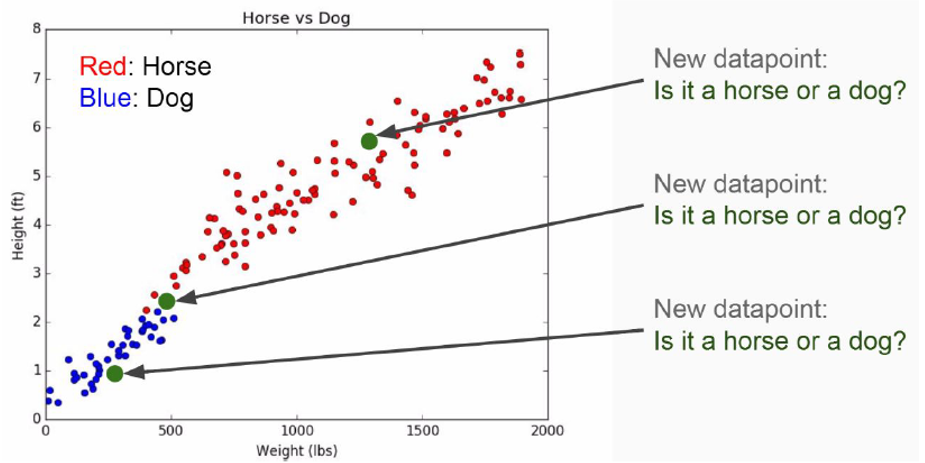

**Explicación del Algoritmo K-Vecinos Más Cercanos (KNN):**

1. **Selección del Valor de K:** Antes de aplicar el algoritmo KNN, debes elegir un valor de K, que representa el número de vecinos más cercanos que se tendrán en cuenta al hacer una predicción. Un valor de K bajo puede llevar a un modelo más sensible al ruido, mientras que un valor de K alto puede suavizar la decisión y hacer que el modelo sea más robusto.

2. **Medición de la Distancia:** El algoritmo KNN utiliza una métrica de distancia, como la distancia euclidiana, para medir la distancia entre puntos de datos en un espacio de características. Esta métrica determina cuán "cercanos" o "lejanos" son los puntos de datos entre sí.

3. **Clasificación:** Para clasificación, cuando se tiene un nuevo punto de datos que se desea clasificar, el algoritmo KNN busca los K puntos de entrenamiento más cercanos a ese punto en el espacio de características.

4. **Votación de Clases:** Una vez que se han encontrado los K vecinos más cercanos, el algoritmo observa las clases de esos vecinos y realiza una votación. La clase que obtiene más votos entre los K vecinos se asigna como la clase de predicción para el nuevo punto.

5. **Regresión:** Para regresión, en lugar de votación de clases, se promedian los valores de regresión de los K vecinos más cercanos para obtener un valor de predicción.

**Imágenes Ilustrativas:**

1. **Visualización de Vecinos Más Cercanos:**

   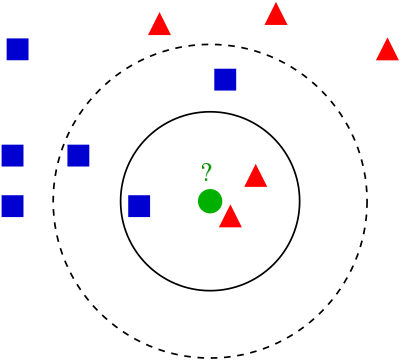

2. **Selección del Valor de K:** Muestra una imagen que compara cómo varían las decisiones de clasificación para diferentes valores de K. Esto ilustra cómo la elección de K afecta la suavidad de las fronteras de decisión.

   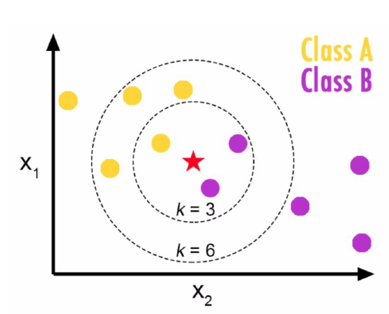

3. **Distancias:**

    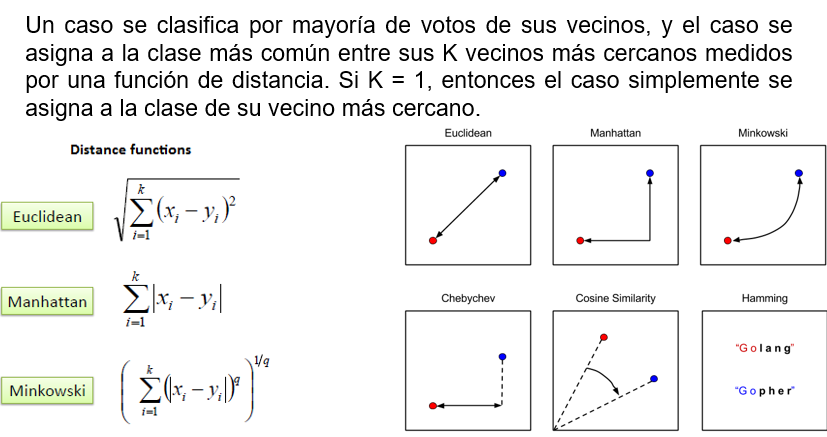
    
4. **Ejemplo KNN:**

    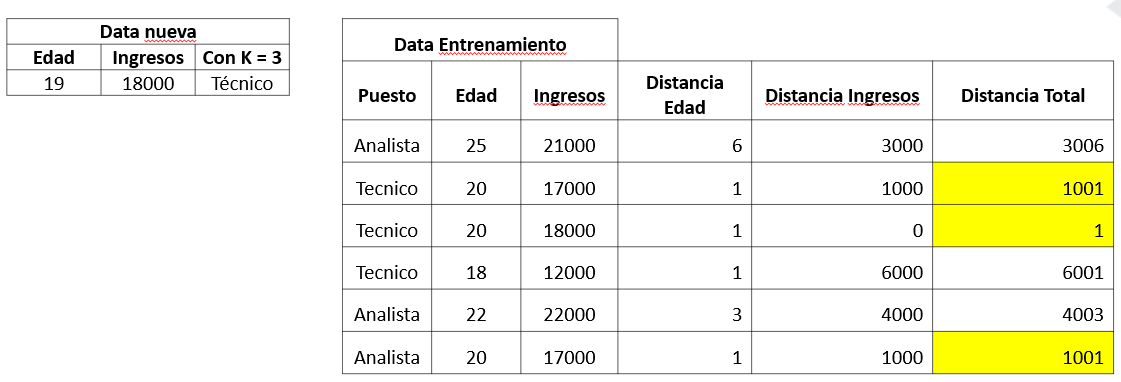
    
5. **Escalamiento de Variables:**

    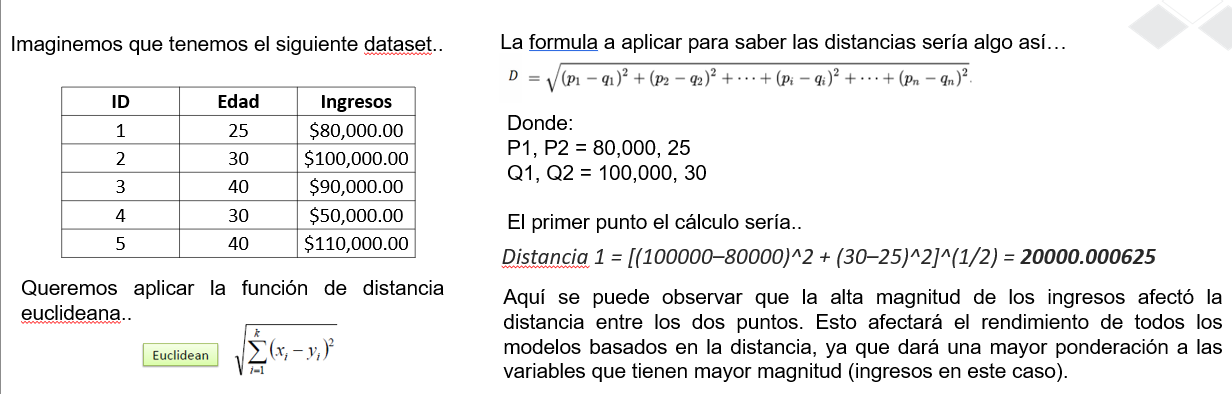
    
    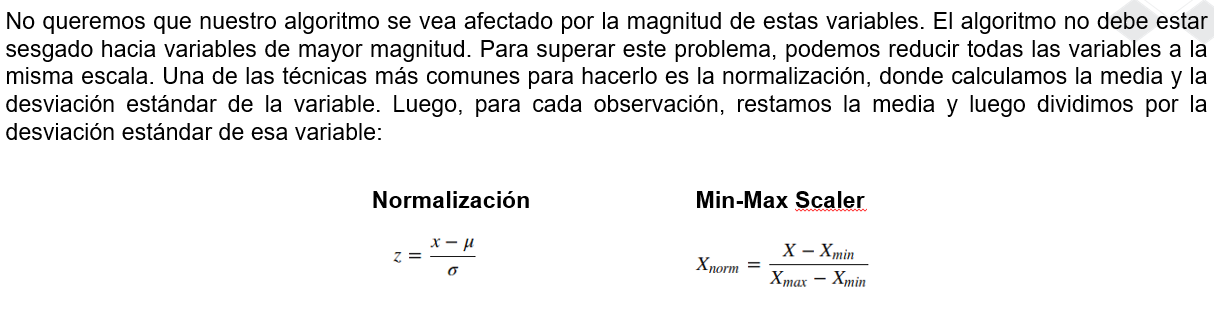
    
    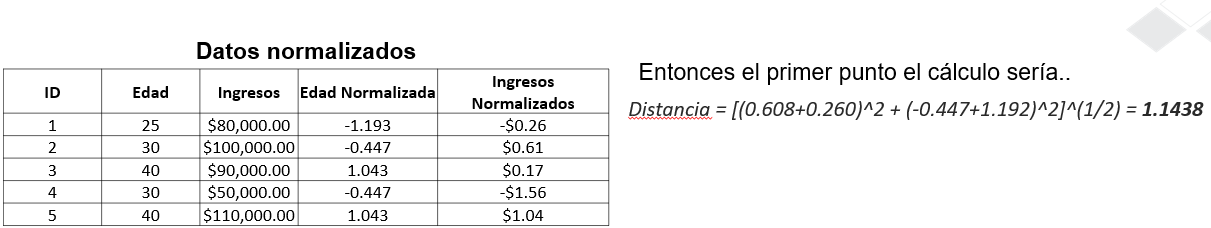
    
    

Estas imágenes ayudarán a visualizar los conceptos clave detrás del algoritmo KNN y cómo se toman decisiones de clasificación o regresión utilizando los K vecinos más cercanos. El algoritmo KNN es intuitivo y fácil de entender, lo que lo hace útil tanto para propósitos de demostración como para aplicaciones prácticas.

In [1]:
from IPython.display import Image

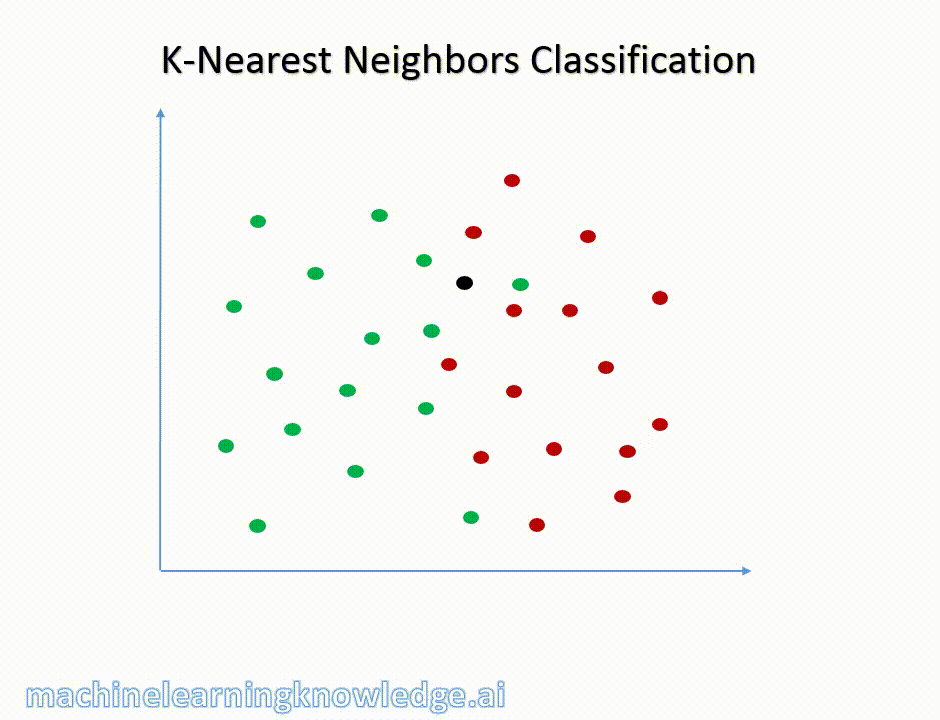

In [2]:
Image(filename=r"C:\Users\gilbe\OneDrive\Desktop\Gilberto\0. TEP\000. Analitica Avanzada de Datos ML\0. Grupo 6\Imagenes\KNN.gif")

# K vecinos más cercanos con Python

¡Le han proporcionado un conjunto de datos sobre autos fabricados en el 1985!

En nuestro nuevo trabajo en un concesionario, como estrategia han definido la compra de vehiculos fabricados en 1985, de entrada tenemos un set de datos de 200 vehiculos con su precio, pero falta un lote mayor, intentaremos entrenar un modelo con el algoritmo KNN para crear un modelo que predice el rango de precio de un vehiculo acorde a ciertas caracteristicas, de manera que podamos utilizarlo para asignar el precio del nuevo lote que está por venir en cuestiendo de segundos.

¡Vamo arriba!

## Importando librerías



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore') 
%matplotlib inline

## Obtener los datos

Mediante el metodo de read_excel con pandas, lea el archivo imports_85_data.xlsx

In [2]:
df = pd.read_excel('imports_85_data.xlsx')

## Exploremos los datos

Utilice los metodos head, info y describe.

In [3]:
df.head()

,marca,combustible,Puertas,cilindros,tamaño del motor,caballos de fuerza,rpm,consumo ciudad,consumo carretera,precio
0,alfa-romero,gas,2,4,130,111,5000,21,27,13495
1,alfa-romero,gas,2,4,130,111,5000,21,27,16500
2,alfa-romero,gas,2,6,152,154,5000,19,26,16500
3,audi,gas,4,4,109,102,5500,24,30,13950
4,audi,gas,4,5,136,115,5500,18,22,17450


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   marca               201 non-null    object
 1   combustible         201 non-null    object
 2   Puertas             201 non-null    int64 
 3   cilindros           201 non-null    int64 
 4   tamaño del motor    201 non-null    int64 
 5   caballos de fuerza  201 non-null    int64 
 6   rpm                 201 non-null    int64 
 7   consumo ciudad      201 non-null    int64 
 8   consumo carretera   201 non-null    int64 
 9   precio              201 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 15.8+ KB


In [5]:
df.describe()

,Puertas,cilindros,tamaño del motor,caballos de fuerza,rpm,consumo ciudad,consumo carretera,precio
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,3.144279,4.363184,126.875622,103.472637,5116.417910,25.179104,30.686567,13207.129353
std,0.992008,1.059452,41.546834,37.373259,478.256317,6.423220,6.815150,7947.066342
min,2.000000,2.000000,61.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,2.000000,4.000000,98.000000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,4.000000,4.000000,120.000000,95.000000,5100.000000,24.000000,30.000000,10295.000000
75%,4.000000,4.000000,141.000000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,4.000000,12.000000,326.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


Utilicemos el metodo describe ahora para las variables categoricas, poniendo como parametro include = 'object'

In [6]:
df.describe(include='object')

,marca,combustible
count,201,201
unique,22,2
top,toyota,gas
freq,32,181


## Ingeniería de variables

En esta ocasión le haremos ingeniería de variables a la variable objetivo, precio, debido a que queremos hacer un ejercicio de clasificación para tener un rango de precio estimado por vehiculo. Usaremos los cuartiles para definir si el precio es economico, medio o caro.

In [7]:
np.percentile(df['precio'],25)

7775.0

In [8]:
np.percentile(df['precio'],75)

16500.0

In [9]:
percentile_25 = np.percentile(df['precio'],25)
percentile_75 = np.percentile(df['precio'],75)

def rango_precio(col):
    if col <= percentile_25:
        return 'economico'
    elif (col <= percentile_75) & (col > percentile_25):
        return 'medio'
    else:
        return 'caro'

Apliquemos la función rango_precio a la columna precio para crear una nueva columna

In [10]:
df['rango_precio'] = df['precio'].apply(lambda x: rango_precio(x))

Veamos cuantos vehiculos tenemos de cada rango_precio con value_counts

In [11]:
df['rango_precio'].value_counts()

medio        100
economico     51
caro          50
Name: rango_precio, dtype: int64

## Estandarizar las variables

Debido a que el clasificador KNN predice la clase de una observación de prueba dada identificando las observaciones más cercanas a ella, la escala de las variables es importante. Cualquier variable que se encuentre a gran escala tendrá un efecto mucho mayor en la distancia entre las observaciones y, por lo tanto, en el clasificador KNN, que las variables que se encuentren en una pequeña escala.

In [12]:
X = df.drop(['rango_precio','precio'], axis=1)
y = df['rango_precio']

## División entrenamiento y prueba

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

## Preprocesamiento de datos

In [15]:
import os

In [16]:
os.chdir('..')

In [17]:
os.getcwd()

'C:\\Users\\gilbe\\0. Curso de Analítica Avanzada de Datos y Machine Learning v4\\06. Aprendizaje Supervisado'

In [18]:
from src.preprocessing import preprocessing

In [19]:
X_train_df, X_test_df = preprocessing(X_train,X_test, scale_nums = True)

In [20]:
X_train_df.head()

,Puertas,cilindros,tama￱o del motor,caballos de fuerza,rpm,consumo ciudad,consumo carretera,marca_alfa-romero,marca_audi,marca_bmw,...,marca_peugot,marca_plymouth,marca_porsche,marca_saab,marca_subaru,marca_toyota,marca_volkswagen,marca_volvo,combustible_diesel,combustible_gas
182,0.891556,-0.338407,-0.449647,-0.548726,0.328460,0.352112,0.570821,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
19,0.891556,-0.338407,-0.865668,-0.953761,0.639165,2.036127,1.878519,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,-1.121635,-0.338407,-0.471543,-0.116689,1.467713,-0.260257,-0.155678,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
33,-1.121635,-0.338407,-0.821876,-0.791747,1.881986,0.811389,0.570821,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
73,-1.121635,-0.338407,-0.821876,-1.007766,0.846302,1.883035,1.587920,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [21]:
X_test_df

,Puertas,cilindros,tama￱o del motor,caballos de fuerza,rpm,consumo ciudad,consumo carretera,marca_alfa-romero,marca_audi,marca_bmw,...,marca_peugot,marca_plymouth,marca_porsche,marca_saab,marca_subaru,marca_toyota,marca_volkswagen,marca_volvo,combustible_diesel,combustible_gas
47,-1.121635,-0.338407,-0.843772,-1.007766,-0.189382,0.811389,0.134921,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
178,-1.121635,-0.338407,-0.712397,-1.439804,-0.603656,1.883035,2.314419,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
91,-1.121635,-0.338407,-0.712397,-0.980764,0.224891,0.964481,1.006720,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
191,0.891556,-0.338407,0.251020,0.234342,0.639165,-0.260257,-0.300978,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
165,-1.121635,-0.338407,0.360499,0.288346,-0.603656,-0.107165,-0.010379,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0.891556,-0.338407,-0.165001,-0.575729,-0.603656,0.199020,0.280221,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
132,-1.121635,-0.338407,-0.186897,1.476450,0.846302,-0.872626,-0.591578,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
60,0.891556,-0.338407,-0.165001,-1.115775,-0.914361,1.729942,1.733220,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
164,-1.121635,-0.338407,0.360499,0.288346,-0.603656,-0.107165,-0.010379,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


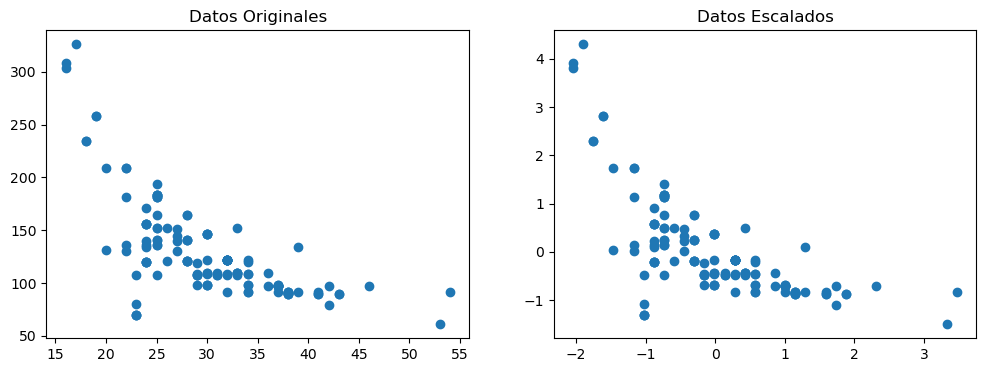

In [22]:
#plt.subplots(filas, columnas, figsize=(ancho, largo))
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].scatter(X_train['consumo carretera'], X_train['tama￱o del motor'])
ax[0].set_title("Datos Originales")
ax[1].scatter(X_train_df['consumo carretera'], X_train_df['tama￱o del motor'])
ax[1].set_title("Datos Escalados")
plt.show()

## Usando KNN

Recuerde que estamos tratando de crear un modelo para predecir el rango de precio que estará un vehiculo segun sus caracteristicas. Empezaremos con k = 1.

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
knn = KNeighborsClassifier(n_neighbors=1)

In [25]:
knn.fit(X_train_df,y_train)

KNeighborsClassifier(n_neighbors=1)

In [26]:
pred = knn.predict(X_test_df)

## Predicciones y evaluaciones

¡Evaluemos nuestro modelo KNN!

In [27]:
from sklearn.metrics import classification_report, plot_confusion_matrix

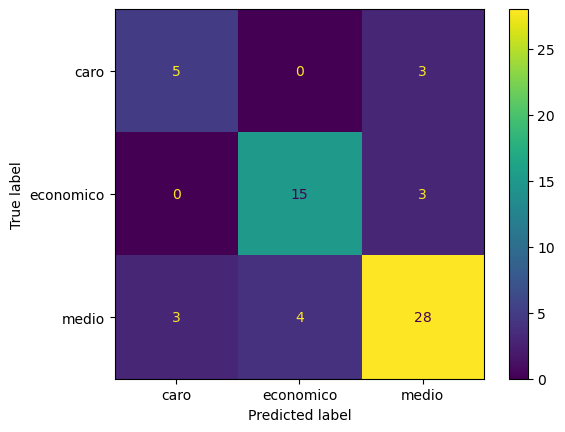

In [28]:
plot_confusion_matrix(knn, X_test_df, y_test)  
plt.show()

In [29]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

        caro       0.62      0.62      0.62         8
   economico       0.79      0.83      0.81        18
       medio       0.82      0.80      0.81        35

    accuracy                           0.79        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.79      0.79      0.79        61



## Elegir un valor K

Sigamos adelante y usemos el método del codo para elegir un buen valor K:

In [30]:
tasa_error = []

# puede que tarde un poco
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_df,y_train)
    pred_i = knn.predict(X_test_df)
    tasa_error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Tasa de Error')

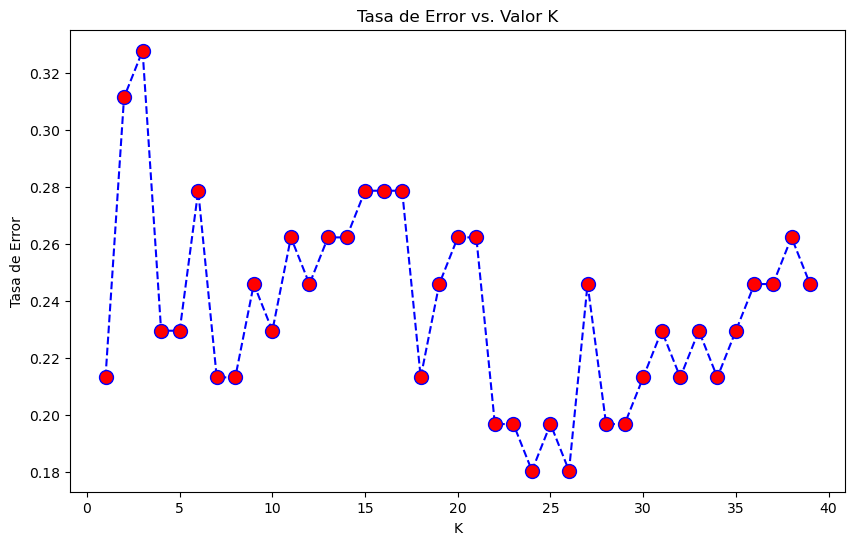

In [32]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),
         tasa_error,
         color='blue', 
         linestyle='dashed', 
         marker='o',
         markerfacecolor='red', 
         markersize=10)
plt.title('Tasa de Error vs. Valor K')
plt.xlabel('K')
plt.ylabel('Tasa de Error')

Aquí podemos ver que después mientras mayor es la k, la tasa de error tiende a subir. ¡Reeduquemos el modelo con k =4  y revisemos el informe de clasificación!

CON K=1




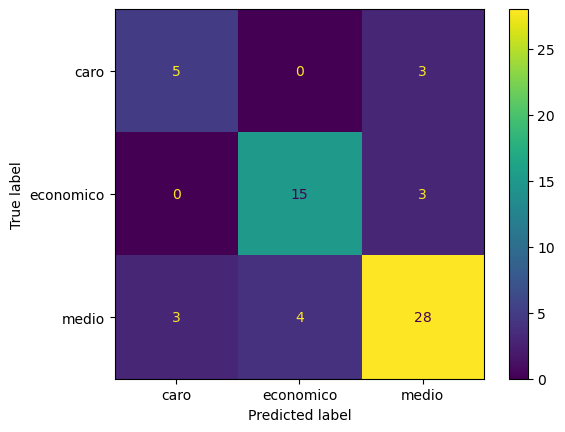



              precision    recall  f1-score   support

        caro       0.62      0.62      0.62         8
   economico       0.79      0.83      0.81        18
       medio       0.82      0.80      0.81        35

    accuracy                           0.79        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.79      0.79      0.79        61



In [33]:
# PRIMERO UNA COMPARACIÓN RÁPIDA CON NUESTRO ORIGINAL K = 1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train_df,y_train)
pred = knn.predict(X_test_df)

print('CON K=1')
print('\n')
plot_confusion_matrix(knn, X_test_df, y_test)  
plt.show()
print('\n')
print(classification_report(y_test,pred))

CON K=6




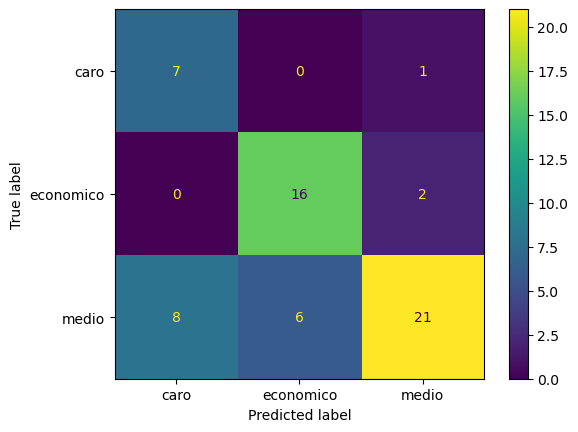



              precision    recall  f1-score   support

        caro       0.47      0.88      0.61         8
   economico       0.73      0.89      0.80        18
       medio       0.88      0.60      0.71        35

    accuracy                           0.72        61
   macro avg       0.69      0.79      0.71        61
weighted avg       0.78      0.72      0.72        61



In [34]:
# AHORA CON K=6
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train_df,y_train)
pred = knn.predict(X_test_df)

print('CON K=6')
print('\n')
plot_confusion_matrix(knn, X_test_df, y_test)  
plt.show()
print('\n')
print(classification_report(y_test,pred))

# Tratemos este problema ahora como un problema de regresion

In [35]:
X = df.drop(['rango_precio','precio'], axis=1)
y = df['precio']

## División entrenamiento y prueba

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

## Preprocesamiento de datos

In [38]:
X_train_df, X_test_df = preprocessing(X_train,X_test)

In [39]:
from sklearn.neighbors import KNeighborsRegressor

In [40]:
knnr = KNeighborsRegressor(n_neighbors=1)

In [41]:
knnr.fit(X_train_df,y_train)

KNeighborsRegressor(n_neighbors=1)

In [42]:
pred = knnr.predict(X_test_df)

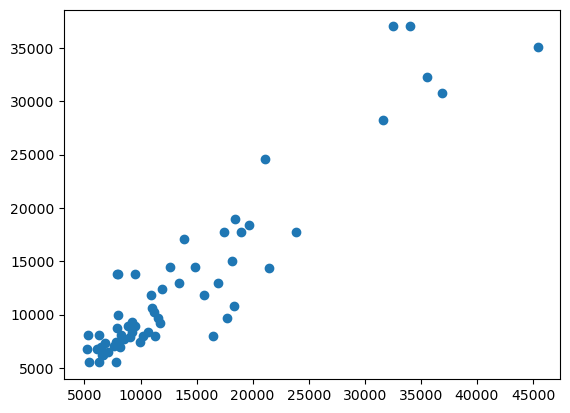

In [43]:
plt.scatter(y_test,pred)

<AxesSubplot:xlabel='precio', ylabel='Count'>

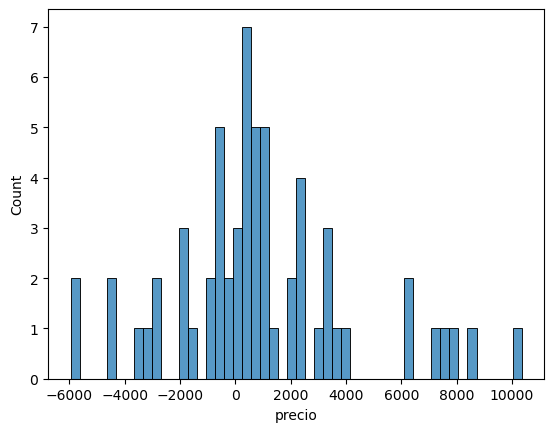

In [44]:
sns.histplot((y_test-pred),bins=50)

In [45]:
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))
print('R2:', r2_score(y_test, pred))

RMSE: 3399.9128291621887
R2: 0.8493009452983202
